## <h1><center>Analytics for Unstructured Data - Assignment 1</center></h1>

<center>Akshat Johari: aj32864<br>  
Aritra Chowdhury: ac79277<br>            
Christian Alfonso: ca35748<br>     
Rushiil Deshmukh: rsd949<br>  
Troy Richard: tdr944</center>


**Website URL:**
https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/

In [1]:
#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 5.4 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [67.4 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.laun

In [2]:
import pandas as pd
import string
import numpy as np
import re

## Web Scraping

In [3]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)

In [4]:
# Create function to replace punctuations in strings
def string_cleanup(s):
    s = s.replace('\n', '')
    s = s.replace('.', ' ')
    s = s.replace(',', ' ')
    s = s.translate(str.maketrans('','',string.punctuation))
    return s

In [5]:
# Create DataFrame to hold all comments
df_comments = pd.DataFrame(columns = ['Date','Comment'])

#Create Webscraper
for pg in range(1, 101):
  wd.get('https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p' + str(pg))

  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")
  comment_ids = []

  for i in ids:
    comment_ids.append(i.get_attribute('id'))
  
  for comments in comment_ids:
    #Extract dates from for each user on a page
    user_date = wd.find_elements_by_xpath('//*[@id="' + comments + '"]/div/div[2]/div[2]/span/a/time')[0].get_attribute('title')

    #Extract Message for each user on a page
    user_message = wd.find_elements_by_xpath('//*[@id="' + comments + '"]/div/div[3]/div/div[1]')[0].text
    user_message = string_cleanup(user_message)
                                   
    #Adding date and comment for each user in a dataframe    
    df_comments.loc[len(df_comments)] = [user_date,user_message]

In [6]:
# Store scraped comments in csv file and download
df_comments.to_csv('Edmunds_Scraped.csv')

from google.colab import files
files.download("Edmunds_Scraped.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df_comments2 = df_comments.copy()

## Task A: Test Zipf's Law

In [31]:
# Import required libraries
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [9]:
# Create function to get frequency counts of words in a string
def frequency_counts(s):
    freq_dist = FreqDist(word.lower() for word in word_tokenize(s))
    return freq_dist

In [10]:
all_comments = ''

# Store all comments in a single variable
for i in range(0, len(df_comments)):
    all_comments = all_comments + str(df_comments['Comment'][i]) + ' '

# Get frequency distribution of words from all comments    
freq_dist = frequency_counts(all_comments).most_common(100)

We plot the Frequency vs Rank plot below


Text(0.5, 1.0, "Frequency vs Rank (Zipf's Law Plot)")

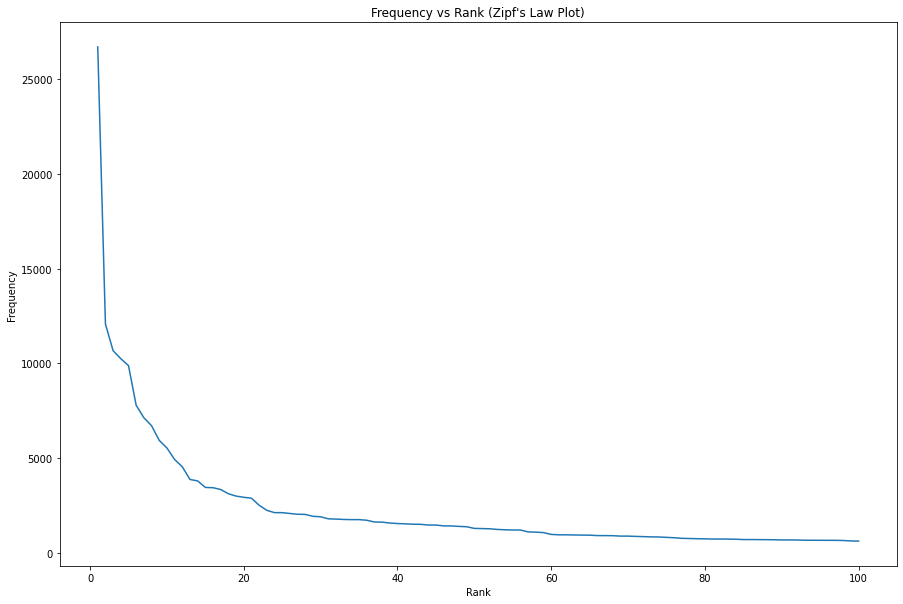

In [11]:
df_zipfs = pd.DataFrame(columns = ['Word', 'Frequency', 'Rank'])

# Store top 100 frequency words in a DataFrame
for i in range(0, len(freq_dist)):
    df_zipfs.loc[len(df_zipfs)] = [freq_dist[i][0], freq_dist[i][1], i + 1]

print('We plot the Frequency vs Rank plot below')
    
# Plot Frequency vs Rank to show Zipf's Law    
plt.figure(figsize=(15,10))
plt.plot(df_zipfs['Rank'], df_zipfs['Frequency'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency vs Rank (Zipf\'s Law Plot)')

We plot the Log transform of the above graph to prove Zipf's Law


Text(0.5, 1.0, 'Frequency vs Rank (Log-Log Scale)')

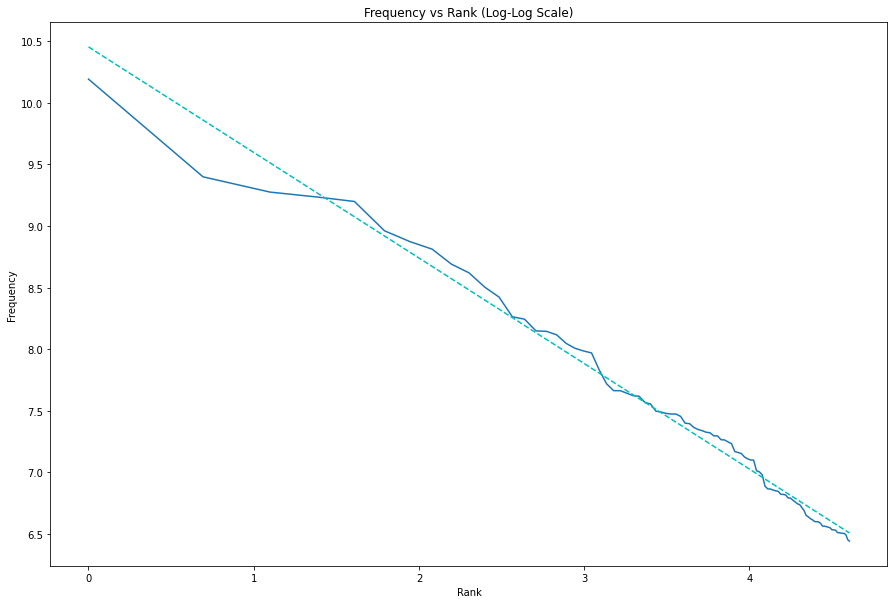

In [12]:
# Plot Log-Log version of Frequency vs Rank to prove Zipf's Law
logR = np.log(df_zipfs['Rank'].astype(float))
logC = np.log(df_zipfs['Frequency'].astype(float))

print('We plot the Log transform of the above graph to prove Zipf\'s Law')

ranks = np.log(df_zipfs['Rank'].astype(float)).tolist()
plt.figure(figsize=(15,10))
plt.plot(logR, logC)
m,c = np.polyfit(logR,logC,1)
y_fit = (m*logR+c)
plt.plot(ranks, y_fit, 'c--')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency vs Rank (Log-Log Scale)')

## Task B: Top 10 Brands by Frequency Counts

In [13]:
uploaded = files.upload()

Saving car models and brands.csv to car models and brands.csv


In [14]:
# Read Car Model and Brand Mapping csv file
df_cars = pd.read_csv('car models and brands.csv')

# Clean up car models and brands
for i in range(0, len(df_cars)):
    df_cars['Model'][i] = string_cleanup(df_cars['Model'][i])

df_cars['Brand'] = df_cars['Brand'].replace(['mercedes', 'mercedes benz', 'mercedes-benz'], 'mercedesbenz')
df_cars['Brand'] = df_cars['Brand'].replace(['hyndai kia'], 'hyundai-kia')
df_cars['Brand'] = df_cars['Brand'].replace(['hyundai,', 'hyundai.'], 'hyundai')
df_cars['Brand'] = df_cars['Brand'].replace(['kia,', 'kia.'], 'kia')
df_cars['Brand'] = df_cars['Brand'].replace(['nissan.'], 'nissan')
df_cars['Brand'] = df_cars['Brand'].replace(['toyata'], 'toyota')
df_cars['Brand'] = df_cars['Brand'].replace(['volkwagen'], 'volkswagen')

In [15]:
# Add Model word count as a column and sort the DataFrame by the word count to replace multi-word models by their brands first
df_cars['Model_Word_Count'] = df_cars['Model'].apply(lambda x:len(x.split(' ')))
df_cars = df_cars.sort_values(by = ['Model_Word_Count'], ascending = False).reset_index()

In [16]:
# Function to remove stopwords
def remove_stopwords(s):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_comments = [w.lower() for w in word_tokens if not w.lower() in stop_words]
    final_comment = ' '
    for i in range(0, len(filtered_comments)):
        final_comment = final_comment + str(filtered_comments[i]) + ' '
    return final_comment

# Function to replace models with brands
def replace_string(comm, df):
    for i in range(0, len(df)):
        comm = comm.replace(' ' + df['Model'][i] + ' ', ' ' + df['Brand'][i] + ' ')
    return comm

In [17]:
# Fill NA Comments with Blanks
df_comments['Comment'].fillna('', inplace = True)
cleaned_comments = ' '
list_cleaned_comments = []

# Remove Stopwords and replace Models with Brands in all comments
for i in range(0, len(df_comments)):
    list_cleaned_comments.append(replace_string(remove_stopwords(df_comments['Comment'][i]), df_cars))
    cleaned_comments = cleaned_comments + list_cleaned_comments[i] + ' '

# Get Frequency distribution of words from cleaned comments
freq_counts = frequency_counts(cleaned_comments).most_common()

# Store the frequencies of top 10 Brands
df_top_10_brands = pd.DataFrame(columns = ['Brand', 'Frequency'])
length = 0
for i in range(0, len(freq_counts)):
    if freq_counts[i][0] not in ('car', 'sedan', 'problem'):
        if freq_counts[i][0] in df_cars['Brand'].tolist():
            df_top_10_brands.loc[len(df_top_10_brands)] = [freq_counts[i][0], freq_counts[i][1]]
            length += 1
    if length == 10:
        break

print('The top 10 Brands and their Frequencies are as follows.') 
df_top_10_brands

The top 10 Brands and their Frequencies are as follows.


,Brand,Frequency
0,bmw,2734
1,acura,825
2,audi,803
3,honda,704
4,infiniti,532
5,nissan,478
6,toyota,419
7,seat,402
8,subaru,361
9,volkswagen,322


## Task C: Lift Ratios

In [18]:
# Store the top 10 brands in a list
top_10_brands = df_top_10_brands['Brand'].tolist()

In [19]:
# Create a function to check whether a brand is mentioned in a comment
def brand_mention(lst, s):
    res = []
    for i in range(0, len(lst)):
        if lst[i] in s:
            res.append(1)
        else:
            res.append(0)
    return res

In [20]:
df_brand_mentions = pd.DataFrame(columns = top_10_brands)

# Store brand mentions in a separate DataFrame
for i in range(0, len(list_cleaned_comments)):
    df_brand_mentions.loc[i] = brand_mention(top_10_brands, list_cleaned_comments[i])

In [21]:
df_brand_lifts = pd.DataFrame(columns = top_10_brands, index = top_10_brands)
df_brand_dissimilarity = df_brand_lifts.copy()

# Calculate Brand Lifts
for i in range(0, len(df_brand_lifts)-1):
    for j in range(i+1, len(df_brand_lifts)):
        num_N = len(df_brand_mentions)
        num_AB = sum(df_brand_mentions[top_10_brands[i]] & df_brand_mentions[top_10_brands[j]])
        denom_A = sum(df_brand_mentions[top_10_brands[i]])
        denom_B = sum(df_brand_mentions[top_10_brands[j]])
        lift_AB = (num_N * num_AB) / (denom_A * denom_B)
        df_brand_lifts.iloc[i][j] = lift_AB

print('The Lift Ratios for the associations between the top 10 brands are as follows.')
df_brand_lifts            

The Lift Ratios for the associations between the top 10 brands are as follows.


,bmw,acura,audi,honda,infiniti,nissan,toyota,seat,subaru,volkswagen
bmw,NaN,1.52414,1.75528,1.28077,1.96902,1.21332,1.38627,1.60439,1.18544,1.50196
acura,NaN,NaN,2.06839,2.53885,3.01668,2.20868,1.7436,1.35348,2.04712,1.77544
audi,NaN,NaN,NaN,1.38175,2.49975,1.4175,1.24609,2.12216,1.82875,4.22654
honda,NaN,NaN,NaN,NaN,1.5094,3.58537,3.51583,1.34446,1.42013,2.13488
infiniti,NaN,NaN,NaN,NaN,NaN,2.93754,1.2393,1.60652,1.76367,2.09314
nissan,NaN,NaN,NaN,NaN,NaN,NaN,3.8408,1.51665,1.57828,2.6759
toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85563,1.38743,2.25327
seat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20146,2.37652
subaru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.41656
volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Task D: MDS Map

In [22]:
# Create brand dissimilarity matrix
for i in range(0, len(df_brand_dissimilarity)):
    for j in range(0, len(df_brand_dissimilarity)):
        if i == j:
            df_brand_dissimilarity.iloc[i][j] = 0
        elif i < j:
            df_brand_dissimilarity.iloc[i][j] = 1 / df_brand_lifts.iloc[i][j]
        else:
            df_brand_dissimilarity.iloc[i][j] = 1 / df_brand_lifts.iloc[j][i]

In [23]:
# Import libraries for the MDS map
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

We plot the MDS Map as shown.


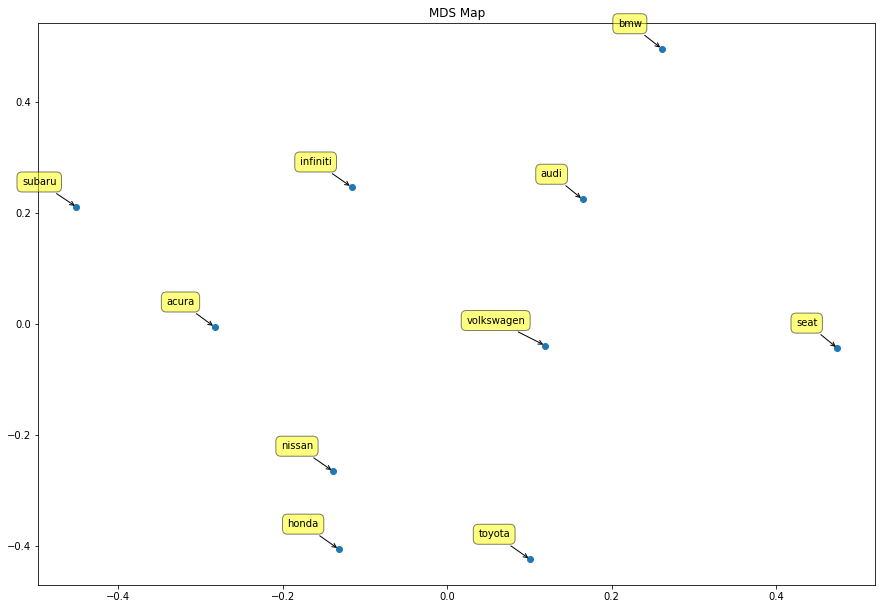

In [24]:
# Plot the MDS map using the computed dissimilarity matrix
mds = MDS(n_components=2, random_state=3, dissimilarity="precomputed")
brand_mds = mds.fit_transform(df_brand_dissimilarity)

print('We plot the MDS Map as shown.')

plt.figure(figsize=(15,10))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    brand_mds[:, 0], brand_mds[:, 1], marker = 'o'
    )
for label, x, y in zip(top_10_brands, brand_mds[:, 0], brand_mds[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.title('MDS Map')
    
plt.show()

## Task E: Insights

Based on the data we have been able to collect so far, we see high lift values between Audi and Volkswagen. Volkswagen owns the Audi brand, so to see a strong correlation isn't unreasonable. Since these brands are ideally working together, it would be safe to assume there isn't a defining line between a consumer looking for a high end, top of the line Volkswagen and a consumer looking to break into the luxury car space with Audi.  Price comparisons for these styles of cars are close enough, and we can see how easy it would be for a consumer to start with a Volkswagen, then build up to an Audi over time. 

This claim can be backed up by looking at our other co-owned brand. We see a high lift value between Honda and Acura, because Honda owns Acura. Even if a consumer isn't necessarily looking to break into the luxury car space, we can say with  confidence the reputation of the parent brand helps solidify consumers for the luxury brand as the consumer gets older and has more experience with the parent brand. This makes moving brands much less threatening to a consumer and allows for an easy target population.

Our lift values don't just reveal relations between co-owned companies, we also see heavy correlations between the different mid-level brands' luxury offerings. Nissan and Toyota share our highest lift value. They are both Japanese car companies with strong roots in the mid-level space. This comparison makes the most sense, since consumers looking for entry level luxury cars would also look to compare from the high end offerings of mid level brands. Additionally, we see that the lift values for Honda-Nissan and Honda-Toyota are comparably high, showing a focus on the direct comparision between said brands.

## Task F: Attributes and Features

The major attributes are found by initially looking at the data and procuring the top 5 from the frequency distribution.

In [25]:
# Store the top 5 attributes in a list
top_5_attributes = ['performance', 'luxury', 'engine', 'price', 'power']
df_top_5_attributes = pd.DataFrame(columns = ['Attribute', 'Frequency'])

# Plot the frequencies of the top 5 attributes
complete = 0
for i in range(0, len(freq_counts)):
    if freq_counts[i][0] in top_5_attributes:
        df_top_5_attributes.loc[len(df_top_5_attributes)] = freq_counts[i]
        complete = complete + 1
    if complete == 5:
        break       

print('The top 5 attributes and their frequencies are as follows.')
df_top_5_attributes

The top 5 attributes and their frequencies are as follows.


,Attribute,Frequency
0,performance,916
1,luxury,687
2,engine,611
3,price,535
4,power,498


In [26]:
df_attribute_mentions = pd.DataFrame(columns = top_5_attributes)

# Store attribute mentions in the cleaned comments in a separate DataFrame
for i in range(0, len(list_cleaned_comments)):
    df_attribute_mentions.loc[i] = brand_mention(top_5_attributes, list_cleaned_comments[i])

df_mentions = df_brand_mentions.copy()
df_mentions[top_5_attributes] = df_attribute_mentions[top_5_attributes]

In [27]:
df_lifts = pd.DataFrame(columns = top_10_brands, index = top_5_attributes)

# Compute Lift ratios for associations between the attributes and brands
for i in range(0, len(df_lifts)):
    for j in range(0, len(df_lifts.columns)):
        num_N = len(df_mentions)
        num_AB = sum(df_mentions[top_5_attributes[i]] & df_brand_mentions[top_10_brands[j]])
        denom_A = sum(df_mentions[top_5_attributes[i]])
        denom_B = sum(df_brand_mentions[top_10_brands[j]])
        lift_AB = (num_N * num_AB) / (denom_A * denom_B)
        df_lifts.iloc[i][j] = lift_AB

print('The Lift Ratios for the associations between the top 5 attributes and the top 10 brands are as follows.')
df_lifts   

The Lift Ratios for the associations between the top 5 attributes and the top 10 brands are as follows.


,bmw,acura,audi,honda,infiniti,nissan,toyota,seat,subaru,volkswagen
performance,1.50597,1.48531,1.45258,1.47346,1.55958,1.29965,1.4005,1.43546,1.68473,1.31964
luxury,1.44055,2.02801,1.58752,1.6899,1.74338,1.59621,2.57382,2.17168,3.14776,2.06906
engine,1.43517,1.53928,1.80862,1.4376,1.46456,2.05418,1.80182,2.0372,1.17978,1.73816
price,1.56895,1.49445,1.9365,1.70715,1.59009,1.14121,1.6355,1.79396,1.22046,2.02785
power,1.53588,1.80642,1.81329,1.71299,1.39814,1.90656,1.17139,2.74904,1.67914,1.89793


## Task G: Insights

There seems to be a relatively low association between the top 10 brands and performance. BMW, Infiniti and Subaru have marginally significant lift values for performance. Further sentiment analysis may be beneficial in understanding the true relationship between these brands and performance.

Subaru has the highest lift value with luxury. In 2005, Toyota acquired 40% of General Motor's stake in Fuji Heavy Industries (Subaru's parent company). Furthermore, Toyota's lift value for luxury is relatively high as well. Therefore, this new association between Subaru brand cars and Toyota could be cause for car enthusiasts to associate Subaru with luxury.

Nissan has the highest lift value with engine. In 2004 the Nissan Maxima was repivoted as a luxury sports sedan, competing directly with the Acura TL and Lexus ES 300. This vehicle has a 3.5 L VQ35DE V6 engine, which has likely created a positive reaction amongst most car enthusiasts. 

Volkswagen has the highest lift value with price. Volkswagen is the parent company for brands such as Audi and SEAT, luxury brands with lower lift values for price than Volkswagen. Volkswagen's high association with price is likely due to the company's ability to offer similar features found in their group's more expensive brand offerings, but under the Volkswagen brand and therefore at a decreased cost.

SEAT has the highest lift value with power. SEAT has formed part of the Audi Brand Group, consisting of Audi, SEAT and Lamborghini, which is  focused on more sporty values, with SEAT's newer offerings falling under the responsibility of the Audi brand. Since 2005, SEAT has also competed in the World Touring Car Championship in 2005. This is likely why car enthusiasts perceive SEAT to have a positive relationship with power. 

## Task H: Aspirational Brands

In [28]:
# Store chosen aspiration words/phrases in a list
aspiration_words = ['want to have', 'love to have', 'dream of', 'like to have', 'want to own', 'dream car', 'next target', 'target', 'aim', 'ambition', 'desire', 'dream', 'eager', 'endeavor', 'inclination', 'inclined', 'wish', 'yearn']
aspiration_mentions = []
aspiration_comments = list_cleaned_comments.copy()

# Replace chosen words/phrases with the word, 'aspiration'
for i in range(0, len(aspiration_comments)):
    for j in range(0, len(aspiration_words)):
        aspiration_comments[i] = aspiration_comments[i].replace(' ' + aspiration_words[j] + ' ', ' aspiration ')

# Store mentions of aspiration in the comments in a separate list
for i in range(0, len(aspiration_comments)):
    if 'aspiration' in aspiration_comments[i]:
        aspiration_mentions.append(1)
    else:
        aspiration_mentions.append(0)

In [29]:
# Append Aspiration Mentions list to the mentions DataFrame
df_aspiration_mentions = df_brand_mentions.copy()
df_aspiration_mentions['aspiration'] = aspiration_mentions

In [30]:
df_aspiration_lifts = pd.DataFrame(columns = ['aspiration'], index = top_10_brands)

# Compute Lift ratios between aspiration and the top 10 brands
for i in range(0, len(df_aspiration_lifts)):
    num_N = len(df_aspiration_mentions)
    num_AB = sum(df_aspiration_mentions[top_10_brands[i]] & df_aspiration_mentions['aspiration'])
    denom_A = sum(df_aspiration_mentions[top_10_brands[i]])
    denom_B = sum(df_aspiration_mentions['aspiration'])
    lift_AB = (num_N * num_AB) / (denom_A * denom_B)
    df_aspiration_lifts.iloc[i] = lift_AB

print('The Lift Ratios for the associations between aspiration and the top 10 brands are as follows.')
df_aspiration_lifts   

The Lift Ratios for the associations between aspiration and the top 10 brands are as follows.


,aspiration
bmw,1.55301
acura,1.80781
audi,1.39146
honda,1.36869
infiniti,1.78103
nissan,1.0226
toyota,1.73874
seat,1.36229
subaru,1.45815
volkswagen,2.37951


Volkswagen is the most aspirational brand among the top entry level luxury sedans in this model. By cross-checking the mention of each brand with terms associated with aspiration, this analysis was able to determine the true market preference of consumers for each brand. The list of words substituted by aspiration is:

['want to have', 'love to have', 'dream of', 'like to have', 'want to own', 'dream car', 'next target', 'target', 'aim', 'ambition', 'desire', 'dream', 'eager', 'endeavor', 'inclination', 'inclined', 'wish', 'yearn']

This high aspiration mark for Volkswagen is quite reasonable. Volkswagen is the parent company of other brands in our top 10 list, Audi and SEAT. Volkswagen's ability to pull desirable features from these more expensive and luxury-branded companies and offer them in a more affordable package makes the company's cars a reasonable aspiration for many car enthusiasts. Further, in 2005 Volkwagen debuted a renewed and improved Jetta line with largely popular reviews.

Volkswagen will soon be the industry standard, which will likely result in increased competition and the need for continued differentiation to maintain this status. If not, advancements by other mid level parent brands with access to subsidaries' advancements such as Toyota will cause a waning on the aspirational hold of the brand among consumers. And, as seen by the relatively high aspirational values of Acura and Infiniti, luxury brands are still genuine competitors in this market.